In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 as cv
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import os
import pickle

from IPython.display import HTML, display
from IPython.display import IFrame
from IPython.display import YouTubeVideo
from IPython.display import Video

import group_emotion.gen.generator as ge_gen
import group_emotion.repr.representer as ge_rep

# for showing float values upto 2 decimal places
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# make this notebook to fill screen width
display(HTML("<style>.container { width:100% !important; }</style>"))

# make output directory if it is not there
try:
    os.mkdir('output')
except FileExistsError:
    pass

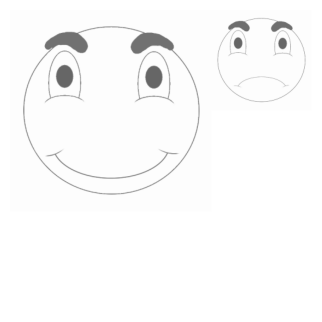

In [3]:
# case 0:
er = ge_rep.emotion_representer(500, 500, 'happy.png', 'sad.png')
happyness_image = er.get_repr(40, 20, 40)
ge_rep.display_image(happyness_image, figsize=(5, 4))

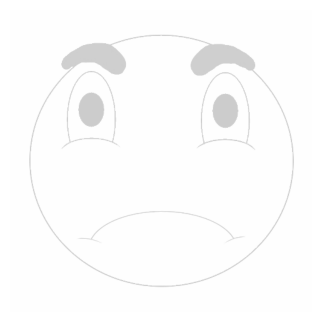

In [4]:
# case 1:
happyness_image = er.get_repr(0, 20, 80)
ge_rep.display_image(happyness_image, figsize=(5, 4))

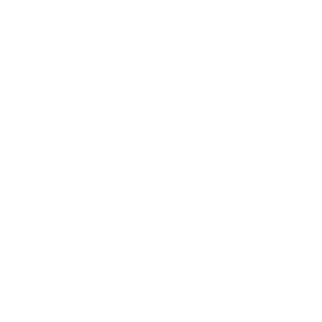

In [5]:
# case 2:
happyness_image = er.get_repr(0, 0, 100)
ge_rep.display_image(happyness_image, figsize=(5, 4))

In [6]:
emoji_window_width = 400 
emoji_window_height = 400
fps = 25
lowest_change_interval = 0.6 # seconds
video_length = 123 # seconds    # 123

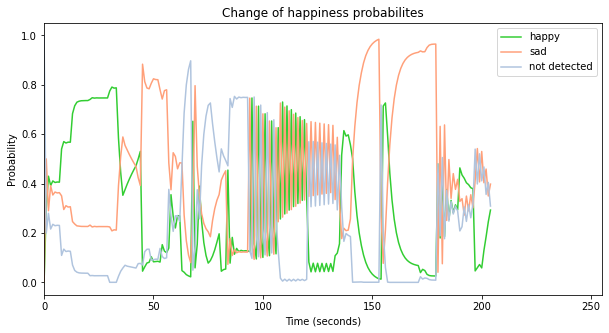

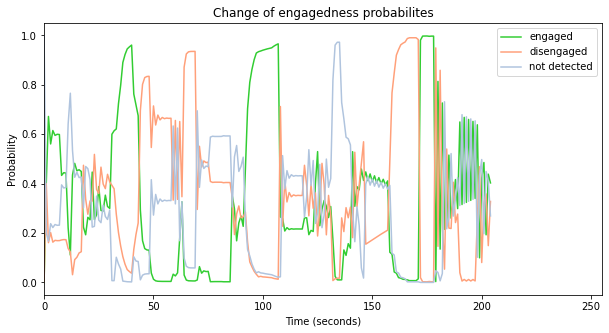

In [7]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])

engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.4, 0.2]])
engagedness_probability = np.array([[0, 0, 1]])

happiness_series = [happiness]
engagedness_series = [engagedness]
happiness_probability_series = [happiness_probability]
engagedness_probability_series = [engagedness_probability]

number_of_frames = int(fps * video_length / (lowest_change_interval * fps))

for i in range(number_of_frames):
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.1)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.1)
    engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    
    happiness_series.append(happiness)
    engagedness_series.append(engagedness)
    happiness_probability_series.append(happiness_probability)
    engagedness_probability_series.append(engagedness_probability)
    
pickle_file = open('output/output.pickle', 'wb')

with open('output/happiness_series.dat', 'wb') as f:
    pickle.dump(happiness_series, f)
    
with open('output/engagedness_series.dat', 'wb') as f:
    pickle.dump(engagedness_series, f)
    
with open('output/happiness_probability_series.dat', 'wb') as f:
    pickle.dump(happiness_probability_series, f)

with open('output/engagedness_probability_series.dat', 'wb') as f:
    pickle.dump(engagedness_probability_series, f)
    
    
happy_emotion = []
sad_emotion = []
happiness_unknown = [] 
engaged_emotion = []
disengaged_emotion = []
engagedness_unknown = []

for i in range(number_of_frames):
    happiness_probability = happiness_probability_series[i]
    happy_emotion.append(happiness_probability[0, 0])
    sad_emotion.append(happiness_probability[0, 1])
    happiness_unknown.append(happiness_probability[0, 2])
    
    engagedness_probability = engagedness_probability_series[i]
    engaged_emotion.append(engagedness_probability[0, 0])
    disengaged_emotion.append(engagedness_probability[0, 1])
    engagedness_unknown.append(engagedness_probability[0, 2])

plt.figure(figsize=(10, 5))
plt.plot(happy_emotion, color='limegreen')
plt.plot(sad_emotion, color='lightsalmon')
plt.plot(happiness_unknown, color='lightsteelblue')
plt.xlim([0, number_of_frames + 50])
plt.xlabel('Time (seconds)')
plt.ylabel('Probability')
plt.title('Change of happiness probabilites')
plt.legend(['happy', 'sad', 'not detected'])
plt.savefig('output/happiness.png', dpi=300)

plt.figure(figsize=(10, 5))
plt.plot(engaged_emotion, color='limegreen')
plt.plot(disengaged_emotion, color='lightsalmon')
plt.plot(engagedness_unknown, color='lightsteelblue')
plt.xlim([0, number_of_frames + 50])
plt.xlabel('Time (seconds)')
plt.ylabel('Probability')
plt.title('Change of engagedness probabilites')
plt.legend(['engaged', 'disengaged', 'not detected'])
plt.savefig('output/engagedness.png', dpi=300)

In [ ]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'happy.png', 'sad.png')

# fourcc = cv.VideoWriter_fourcc(*'XVID')
fourcc = cv.VideoWriter_fourcc(*'MJPG')
# fourcc = cv.VideoWriter_fourcc(*'FMP4')
# video_writer = cv.VideoWriter('output/emoji.avi',cv.VideoWriter_fourcc('M','J','P','G'), 25, (max_width, max_height))
video_writer = cv.VideoWriter('output/happyness.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(number_of_frames):
    happiness_probability = happiness_probability_series[i]
    happiness_image = er.get_repr(happiness_probability[0, 0], happiness_probability[0, 1], happiness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(happiness_image)
    
video_writer.release()

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [ ]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'happy_abstract.png', 'sad_abstract.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/happyness_abstract.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(number_of_frames):
    happiness_probability = happiness_probability_series[i]
    happiness_image = er.get_repr(happiness_probability[0, 0], happiness_probability[0, 1], happiness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(happiness_image)
    
video_writer.release()

In [ ]:
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])
engagedness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'engaged.png', 'disengaged.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/engagedness.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(number_of_frames): 
    engagedness_probability = engagedness_probability_series[i]
    engagedness_image = er.get_repr(engagedness_probability[0, 0], engagedness_probability[0, 1], engagedness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(engagedness_image)
    
video_writer.release()

In [ ]:
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])
engagedness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'engaged_abstract.png', 'disengaged_abstract.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/engagedness_abstract.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(number_of_frames):   
    engagedness_probability = engagedness_probability_series[i]
    engagedness_image = er.get_repr(engagedness_probability[0, 0], engagedness_probability[0, 1], engagedness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(engagedness_image)
    
video_writer.release()

### Now combine all of the parts

In [ ]:
border = 5
text_canvas_height = 100
happiness_text_canvas = (np.ones((text_canvas_height + border, emoji_window_width, 3)) * 255).astype(np.uint8)
happiness_text_canvas = cv.putText(happiness_text_canvas, 'Happiness', (120, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv.LINE_AA, False)
# apply a black border at the bottom of happiness_text_canvas
happiness_text_canvas[-border:, :, :] = (np.zeros((border, emoji_window_width, 3)) * 255).astype(np.uint8)
ge_rep.display_image(happiness_text_canvas, figsize=(5, 4))

In [ ]:
engagedness_text_canvas = (np.ones((text_canvas_height + border, emoji_window_width, 3)) * 255).astype(np.uint8)
engagedness_text_canvas = cv.putText(engagedness_text_canvas, 'Engagedness', (100, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv.LINE_AA, False)
# apply a black border at the bottom of engagedness_text_canvas
engagedness_text_canvas[-border:, :, :] = (np.zeros((border, emoji_window_width, 3)) * 255).astype(np.uint8)
ge_rep.display_image(engagedness_text_canvas, figsize=(5, 4))

In [ ]:
fps = 25


meeting_capture = cv.VideoCapture('output/meetingView1.webm')
happyness_capture = cv.VideoCapture('output/happyness.mp4')
engagedness_capture = cv.VideoCapture('output/engagedness.mp4')

captures = [meeting_capture, happyness_capture, engagedness_capture]
for capture in captures:
    if not capture.isOpened():
        print('video file couldn\'t be opened.')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/meeting_combined.mp4',fourcc, fps, (1920, 1080))

frame_no = 0
while True:
    break_loop = False
    frames_this_timestamp = []
    for capture in captures:
        ret, frame = capture.read()
        if not ret:
            break_loop = True
            break
        if frame is None:
            break_loop = True
            break
        frames_this_timestamp.append(frame)
        
#     for frame in frames_this_timestamp:
#         print(f'frame shape: {frame.shape}')
#         break_loop = True
   
    if break_loop:
        break
        
    modified_frame = frames_this_timestamp[0]
    happyness_frame = frames_this_timestamp[1]
    engagedness_frame = frames_this_timestamp[2]
    
    
    side_border = 20
    vertical_start = side_border
    
    modified_frame[vertical_start : vertical_start + happiness_text_canvas.shape[0], modified_frame.shape[1] - happiness_text_canvas.shape[1] - side_border : - side_border, :] = happiness_text_canvas
    vertical_start = vertical_start + happiness_text_canvas.shape[0]
    
    modified_frame[vertical_start : vertical_start + happyness_frame.shape[0], modified_frame.shape[1] - happyness_frame.shape[1] - side_border : - side_border, :] = happyness_frame
    vertical_start = vertical_start + happyness_frame.shape[0] + side_border
    
    modified_frame[vertical_start : vertical_start + engagedness_text_canvas.shape[0], modified_frame.shape[1] - engagedness_text_canvas.shape[1] - side_border : - side_border, :] = engagedness_text_canvas
    vertical_start = vertical_start + engagedness_text_canvas.shape[0]
    
    modified_frame[vertical_start : vertical_start + engagedness_frame.shape[0], modified_frame.shape[1] - engagedness_frame.shape[1] - side_border : - side_border, :] = engagedness_frame

    
    video_writer.write(modified_frame)
    
    
    
    
    
    if frame_no == 500:
        break_loop = True
    frame_no = frame_no + 1
    
    

video_writer.release()
    
for capture in captures:
    capture.release()
    


In [ ]:
fps = 25


meeting_capture = cv.VideoCapture('output/meetingView1.webm')
happyness_capture = cv.VideoCapture('output/happyness_abstract.mp4')
engagedness_capture = cv.VideoCapture('output/engagedness_abstract.mp4')

captures = [meeting_capture, happyness_capture, engagedness_capture]
for capture in captures:
    if not capture.isOpened():
        print('video file couldn\'t be opened.')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/meeting_combined_abstract.mp4',fourcc, fps, (1920, 1080))

frame_no = 0
while True:
    break_loop = False
    frames_this_timestamp = []
    for capture in captures:
        ret, frame = capture.read()
        if not ret:
            break_loop = True
            break
        if frame is None:
            break_loop = True
            break
        frames_this_timestamp.append(frame)
        
#     for frame in frames_this_timestamp:
#         print(f'frame shape: {frame.shape}')
#         break_loop = True
   
    if break_loop:
        break
        
    modified_frame = frames_this_timestamp[0]
    happyness_frame = frames_this_timestamp[1]
    engagedness_frame = frames_this_timestamp[2]
    
    
    side_border = 20
    vertical_start = side_border
    
    modified_frame[vertical_start : vertical_start + happiness_text_canvas.shape[0], modified_frame.shape[1] - happiness_text_canvas.shape[1] - side_border : - side_border, :] = happiness_text_canvas
    vertical_start = vertical_start + happiness_text_canvas.shape[0]
    
    modified_frame[vertical_start : vertical_start + happyness_frame.shape[0], modified_frame.shape[1] - happyness_frame.shape[1] - side_border : - side_border, :] = happyness_frame
    vertical_start = vertical_start + happyness_frame.shape[0] + side_border
    
    modified_frame[vertical_start : vertical_start + engagedness_text_canvas.shape[0], modified_frame.shape[1] - engagedness_text_canvas.shape[1] - side_border : - side_border, :] = engagedness_text_canvas
    vertical_start = vertical_start + engagedness_text_canvas.shape[0]
    
    modified_frame[vertical_start : vertical_start + engagedness_frame.shape[0], modified_frame.shape[1] - engagedness_frame.shape[1] - side_border : - side_border, :] = engagedness_frame

    
    video_writer.write(modified_frame)
    
    
    
    
    
    if frame_no == 500:
        break_loop = True
    frame_no = frame_no + 1
    
    

video_writer.release()
    
for capture in captures:
    capture.release()